In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'  #默认为'last'
# import warnings 
# warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics
%matplotlib inline

In [4]:
train_set = pd.read_csv("./train_set.csv")
train_set = pd.DataFrame(train_set)
train_set = train_set.drop(columns="ID")
# test_set = pd.DataFrame(train_set)
train_set.head()
# test_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [5]:
train_set.shape

(25317, 17)

In [6]:
vec = DictVectorizer(sparse=False)
train_set = vec.fit_transform(train_set.to_dict(orient="record"))
train_set = pd.DataFrame(train_set)
train_set.columns = vec.feature_names_
#不均衡样本处理
train_set

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous,y
0,43.0,291.0,2.0,0.0,0.0,1.0,9.0,1.0,0.0,150.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,42.0,5076.0,1.0,1.0,0.0,0.0,7.0,1.0,0.0,99.0,...,0.0,0.0,0.0,251.0,0.0,1.0,0.0,0.0,2.0,0.0
2,47.0,104.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,77.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,-994.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,174.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42.0,2974.0,5.0,0.0,0.0,1.0,21.0,1.0,0.0,187.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,55.0,8180.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,854.0,...,0.0,0.0,0.0,360.0,1.0,0.0,0.0,0.0,1.0,1.0
25313,52.0,961.0,1.0,1.0,0.0,0.0,18.0,1.0,0.0,222.0,...,0.0,0.0,0.0,553.0,1.0,0.0,0.0,0.0,4.0,1.0
25314,35.0,300.0,2.0,0.0,0.0,1.0,13.0,1.0,0.0,945.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0
25315,37.0,66.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,1164.0,...,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [7]:
x_train = train_set.iloc[:,:-1].copy()
y_train = train_set.iloc[:,-1].copy()

In [8]:
# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=33)
# x_train
# y_train.shape

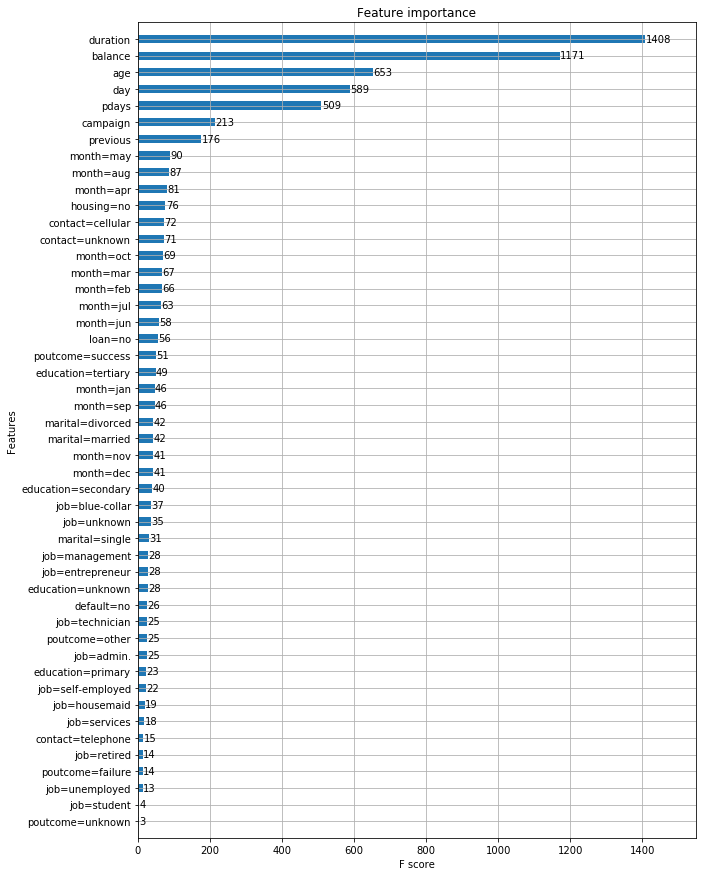

'\n选择一个相对来说稍微高一点的learning rate。一般默认的值是0.1，不过针对不同的问题，0.05到0.2之间都可以\n决定当前learning rate下最优的决定树数量。它的值应该在40-70之间。记得选择一个你的电脑还能快速运行的值，因为之后这些树会用来做很多测试和调参。\n接着调节树参数来调整learning rate和树的数量。我们可以选择不同的参数来定义一个决定树，后面会有这方面的例子\n降低learning rate，同时会增加相应的决定树数量使得模型更加稳健\n\n'

In [9]:
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000)
model.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(model, height=0.5, max_num_features=64, ax=ax)
plt.show()
'''
选择一个相对来说稍微高一点的learning rate。一般默认的值是0.1，不过针对不同的问题，0.05到0.2之间都可以
决定当前learning rate下最优的决定树数量。它的值应该在40-70之间。记得选择一个你的电脑还能快速运行的值，因为之后这些树会用来做很多测试和调参。
接着调节树参数来调整learning rate和树的数量。我们可以选择不同的参数来定义一个决定树，后面会有这方面的例子
降低learning rate，同时会增加相应的决定树数量使得模型更加稳健

'''

In [10]:
def modelfit(alg, X, Y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=Y.values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(X, Y, eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:, 1]

    #Print model report:
    print("\nModel Report")
    print("Best Num Of Tree:{}".format(cvresult.shape[0]))
    print("Accuracy : %.4g" %
          metrics.accuracy_score(Y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y, dtrain_predprob))

    feat_imp = pd.Series(
        alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Best Num Of Tree:186
Accuracy : 0.939
AUC Score (Train): 0.967791


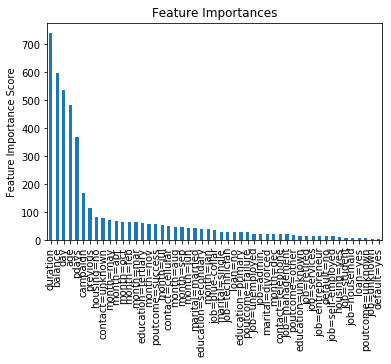

In [11]:
xgb1 = XGBClassifier(learning_rate=0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
# 得到Best Num Of Tree
modelfit(xgb1, x_train, y_train)

In [31]:
param_test1 = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=5,
                                                min_child_weight=2,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test1,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch1.fit(x_train, y_train)

res1 = gsearch1.cv_results_
res2 = gsearch1.best_params_
res3 = gsearch1.best_score_

print(res1)
print(res2)
print(res3)
with open("./a.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

{'mean_fit_time': array([ 7.46664238,  6.81677766,  6.6562079 , 11.11010365, 12.98828387,
       14.79944286, 17.85457816, 15.6879724 , 16.20109591, 22.51022425,
       19.26953921, 19.37482781]), 'std_fit_time': array([0.31515767, 0.04517408, 0.18712284, 0.16656481, 2.73861018,
       2.3655751 , 0.97338261, 0.29394803, 0.21066162, 1.51940445,
       1.03934093, 1.73010328]), 'mean_score_time': array([0.04308567, 0.03271298, 0.03171597, 0.04508004, 0.04886971,
       0.04428153, 0.04847131, 0.06781931, 0.04767318, 0.06323094,
       0.060639  , 0.05724769]), 'std_score_time': array([0.00193407, 0.00582808, 0.00385716, 0.00796369, 0.00520131,
       0.00638871, 0.00552039, 0.01342552, 0.00674634, 0.01299658,
       0.01002127, 0.00537435]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), '

3243

In [37]:
param_test2 = {'max_depth': [5, 6, 7, 8], 'min_child_weight': [5, 6, 7, 8]}
gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test2,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch2.fit(x_train, y_train)
res1 = gsearch2.cv_results_
res2 = gsearch2.best_params_
res3 = gsearch2.best_score_
print(res1)
print(res2)
print(res3)
with open("./a2.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

{'mean_fit_time': array([11.41728497, 11.58244286, 10.87652726, 10.90425277, 12.8037765 ,
       13.03874907, 13.17638111, 12.84765916, 15.11579733, 14.94605093,
       14.96898942, 14.97787194, 16.9421309 , 17.18211946, 17.203018  ,
       17.01651626]), 'std_fit_time': array([0.45101273, 0.36001219, 0.09541871, 0.04759022, 0.17698369,
       0.16575689, 0.14404432, 0.19239262, 0.14061053, 0.02515202,
       0.12529538, 0.0479141 , 0.18615538, 0.21442397, 0.1955456 ,
       0.11890827]), 'mean_score_time': array([0.06881475, 0.05325627, 0.0396945 , 0.04468145, 0.05445576,
       0.04827108, 0.06642323, 0.06861653, 0.06203465, 0.05146289,
       0.05944238, 0.04468122, 0.04827204, 0.04906936, 0.05505295,
       0.04867091]), 'std_score_time': array([0.01662861, 0.00498826, 0.01025566, 0.01078609, 0.01100838,
       0.0065121 , 0.02344588, 0.02003005, 0.01123676, 0.0102993 ,
       0.00926114, 0.00677652, 0.00706996, 0.00744745, 0.0123827 ,
       0.01023678]), 'param_max_depth': masked

4111

In [40]:
param_test3 = {'gamma': [i / 10.0 for i in range(0, 5)]}
gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=6,
                                                min_child_weight=6,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test3,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch3.fit(x_train, y_train)
res1 = gsearch3.cv_results_
res2 = gsearch3.best_params_
res3 = gsearch3.best_score_
print(res1)
print(res2)
print(res3)
with open("./a3.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

{'mean_fit_time': array([12.31189189, 12.24985733, 12.4565042 , 12.59313927, 11.13364067]), 'std_fit_time': array([0.07542597, 0.06806965, 0.29165981, 0.10036552, 3.54730229]), 'mean_score_time': array([0.04188857, 0.04827213, 0.05006757, 0.05724864, 0.05246024]), 'std_score_time': array([0.00467736, 0.00819058, 0.01408195, 0.01414231, 0.01453043]), 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.0}, {'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.3}, {'gamma': 0.4}], 'split0_test_score': array([0.9343877 , 0.93578745, 0.93632782, 0.93689194, 0.93512528]), 'split1_test_score': array([0.93853482, 0.93765301, 0.93757556, 0.93760541, 0.93739799]), 'split2_test_score': array([0.93843735, 0.93793221, 0.93711199, 0.93864779, 0.93708516]), 'split3_test_score': array([0.93208107, 0.9309261 , 0.9311271 , 0.93182359, 0.93170401]), 'split4_test_score': array([0.9

1350

In [47]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=6,
                                                min_child_weight=6,
                                                gamma=0.3,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test4,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch4.fit(x_train, y_train)

res1 = gsearch4.cv_results_
res2 = gsearch4.best_params_
res3 = gsearch4.best_score_
print(res1)
print(res2)
print(res3)
with open("./a4.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

{'mean_fit_time': array([11.53855805, 11.4769237 , 11.36881213, 11.32193751, 13.87950153,
       12.01169243, 11.9075716 , 11.30697689, 13.76620374, 13.41517434,
       13.07588129, 12.44772797, 14.4733139 , 14.8818223 , 14.38634639,
       13.70975485]), 'std_fit_time': array([0.19092895, 0.49278641, 0.31613152, 0.06128949, 0.86799847,
       0.08477088, 0.08159566, 0.22809117, 0.19629266, 0.26334563,
       0.17631783, 0.26664935, 0.22926301, 0.20583472, 0.17105944,
       0.2584124 ]), 'mean_score_time': array([0.05606112, 0.0422873 , 0.04687557, 0.04827166, 0.04488072,
       0.04109054, 0.04667597, 0.05485363, 0.04587803, 0.05046616,
       0.05505395, 0.04687543, 0.04129024, 0.04488049, 0.04129033,
       0.0452795 ]), 'std_score_time': array([0.02008959, 0.00720806, 0.00624453, 0.00859346, 0.00682296,
       0.00193376, 0.00897389, 0.01106989, 0.008625  , 0.00786862,
       0.00874951, 0.0096692 , 0.00537477, 0.00664578, 0.00603664,
       0.00537467]), 'param_colsample_bytree':

4282

In [14]:
param_test5 = {
    'subsample': [i / 100.0 for i in range(75, 90, 5)],
    'colsample_bytree': [i / 100.0 for i in range(85, 100, 5)]
}

gsearch5 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=6,
                                                min_child_weight=6,
                                                gamma=0.3,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test5,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch5.fit(x_train, y_train)

res1 = gsearch5.cv_results_
res2 = gsearch5.best_params_
res3 = gsearch5.best_score_
print(res1)
print(res2)
print(res3)
with open("./a5.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

{'mean_fit_time': array([15.65514255, 14.70005441, 15.613939  , 16.63346105, 17.93562069,
       15.48017907, 16.47790608, 16.64811549, 12.82765951]), 'std_fit_time': array([0.82757577, 1.0499891 , 0.29927398, 0.56475263, 1.18320044,
       0.49149978, 1.38805693, 0.50911863, 4.08243304]), 'mean_score_time': array([0.05422993, 0.04719176, 0.06467395, 0.04648447, 0.04679809,
       0.06584764, 0.05568867, 0.04768181, 0.04562597]), 'std_score_time': array([0.01130028, 0.01079071, 0.01581606, 0.00497589, 0.01033225,
       0.01922951, 0.00968865, 0.00716358, 0.0068815 ]), 'param_colsample_bytree': masked_array(data=[0.85, 0.85, 0.85, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
             mask=[False, False, False, False, False, False, False, False,
          

2664


Model Report
Best Num Of Tree:1700
Accuracy : 0.9394
AUC Score (Train): 0.968261


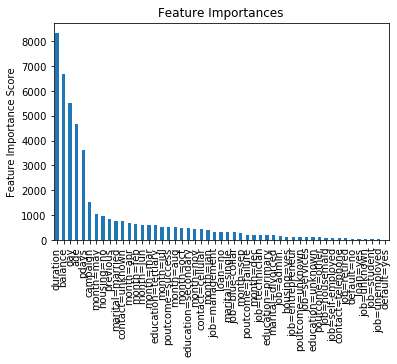

In [17]:
xgb1 = XGBClassifier(learning_rate=0.01,
                     n_estimators=1700,
                     max_depth=6,
                     min_child_weight=6,
                     gamma=0.3,
                     subsample=0.9,
                     colsample_bytree=0.85,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
# 得到Best Num Of Tree
modelfit(xgb1, x_train, y_train)

In [18]:
xgb1 = XGBClassifier(learning_rate=0.01,
                     n_estimators=1700,
                     max_depth=6,
                     min_child_weight=6,
                     gamma=0.3,
                     subsample=0.9,
                     colsample_bytree=0.85,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
xgb1.fit(x_train, y_train)
# xgb1.score(x_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=None, n_estimators=1700, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.9, verbosity=1)

In [20]:
test_set = pd.read_csv("./test_set.csv")
ID = test_set['ID']
test_set = test_set.drop(columns="ID")
test_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,29,management,single,tertiary,no,54,yes,yes,unknown,26,may,257,3,-1,0,unknown
10848,35,management,married,secondary,no,674,no,no,cellular,8,aug,87,2,-1,0,unknown
10849,38,services,married,secondary,no,435,yes,no,unknown,23,may,193,2,-1,0,unknown
10850,41,admin.,divorced,secondary,no,783,yes,yes,cellular,14,may,135,3,363,2,failure


In [21]:
vec = DictVectorizer(sparse=False)
data = vec.fit_transform(test_set.to_dict(orient="record"))
data = pd.DataFrame(data)
data.columns = vec.feature_names_
data

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
0,51.0,174.0,3.0,0.0,1.0,0.0,29.0,1.0,0.0,308.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,32.0,6059.0,2.0,1.0,0.0,0.0,20.0,1.0,0.0,110.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,0.0,3.0,0.0,1.0,0.0,30.0,1.0,0.0,130.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,32.0,64.0,4.0,1.0,0.0,0.0,30.0,1.0,0.0,598.0,...,0.0,0.0,0.0,0.0,105.0,1.0,0.0,0.0,0.0,5.0
4,41.0,0.0,4.0,1.0,0.0,0.0,15.0,1.0,0.0,368.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,29.0,54.0,3.0,0.0,0.0,1.0,26.0,1.0,0.0,257.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10848,35.0,674.0,2.0,1.0,0.0,0.0,8.0,1.0,0.0,87.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10849,38.0,435.0,2.0,0.0,0.0,1.0,23.0,1.0,0.0,193.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10850,41.0,783.0,3.0,1.0,0.0,0.0,14.0,1.0,0.0,135.0,...,1.0,0.0,0.0,0.0,363.0,1.0,0.0,0.0,0.0,2.0


In [22]:
predict = xgb1.predict_proba(data)
result = pd.DataFrame(predict).iloc[:,1]
ID = pd.DataFrame(ID)
ID.insert(1,"pred",result)
ID.to_csv("result.csv",index=False)